# Path Optimizer Project

## By using training dataset from Palletizing

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.models import model_from_json
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ModuleNotFoundError: No module named 'tensorflow'

## Import csv data 

> [rws_train.csv](https://raw.githubusercontent.com/6131866021/ABB/main/PathPlan/rws_train.csv)

In [ ]:
df = pd.read_csv('rws_train.csv')

NameError: name 'pd' is not defined

In [ ]:
df.head()

,A_X,A_Y,A_Z,B_X,B_Y,B_Z,C_X,C_Y,C_Z,time
0,1650.0,880.0,1220.0,187.5,2647.5,482.0,1312.60,1392.96,1306.42,3.192
1,1670.0,-880.0,1205.0,210.0,-2675.0,672.0,734.17,-1977.27,825.16,2.976
2,1670.0,-880.0,1205.0,825.0,-2600.0,467.0,892.59,-1236.88,1028.70,2.928
3,1670.0,-880.0,1205.0,825.0,-2600.0,467.0,892.59,-1236.88,1028.70,2.928
4,1650.0,880.0,1220.0,662.5,2647.5,482.0,986.91,1552.88,1890.24,2.904


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2578 entries, 0 to 2577
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A_X     2578 non-null   float64
 1   A_Y     2578 non-null   float64
 2   A_Z     2578 non-null   float64
 3   B_X     2578 non-null   float64
 4   B_Y     2578 non-null   float64
 5   B_Z     2578 non-null   float64
 6   C_X     2578 non-null   float64
 7   C_Y     2578 non-null   float64
 8   C_Z     2578 non-null   float64
 9   time    2578 non-null   float64
dtypes: float64(10)
memory usage: 201.5 KB


> Split data into train and test set 20%

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("time", axis=1)
y = df["time"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test), len(y_train), len(y_test)

(2578, 2062, 516, 2062, 516)

In [ ]:
X_train.head()

,A_X,A_Y,A_Z,B_X,B_Y,B_Z,C_X,C_Y,C_Z
1706,1670.0,-880.0,1205.0,210.0,-2435.0,672.0,870.12,-1297.93,1049.14
2452,1650.0,880.0,1220.0,600.0,2360.0,702.0,1081.19,2045.28,928.76
2189,1670.0,-880.0,1205.0,990.0,-2045.0,467.0,1374.73,-1390.75,888.21
361,1670.0,-880.0,1205.0,210.0,-2675.0,672.0,704.31,-1873.64,922.87
2093,1650.0,880.0,1220.0,250.0,2010.0,702.0,944.13,1507.86,1022.36


## Build deep learning model with Keras Tensorflow

**5 modelling experiments**

1. `model_1` - {Layer: 1, Activation: none, Optimizers: Adam, Loss: mse} 
2. `model_2` - {Layer: 2, Activation: linear, Optimizers: Adam, Loss: mse} 
3. `model_3` - {Layer: 3, Activation: linear, Optimizers: Adam, Loss: mse} 
4. `model_4` - 
5. `model_5` -

> Define important functions

In [ ]:
def add_ypreds(X_test, y_test, y_preds):
  df = list()
  for i in range(len(X_test)):
    row = list(X_test.iloc[i])
    row.append(y_test.iloc[i])
    row.append(np.mean(y_preds[i]))
    df.append(row)
  return pd.DataFrame(df, columns=["A_X", "A_Y", "A_Z", "B_X", "B_Y", "B_Z", "C_X", "C_Y", "C_Z", "Time", "Predict Time"])

### Build `model_1`

1. Layer: 1 
2. Activation: none
3. Optimizers: Adam
4. Loss: mse

In [ ]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(100)])
model_1.compile( loss=tf.keras.losses.mse,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mse"])
model_1.fit(X_train, y_train, epochs=200, verbose=1, callbacks=[callback])

Epoch 1/200
65/65 [==============================] - 0s 1ms/step - loss: 138381.8750 - mse: 138381.8750
Epoch 2/200
65/65 [==============================] - 0s 1ms/step - loss: 28882.0371 - mse: 28882.0371
Epoch 3/200
65/65 [==============================] - 0s 1ms/step - loss: 8053.7168 - mse: 8053.7168
Epoch 4/200
65/65 [==============================] - 0s 1ms/step - loss: 4135.8755 - mse: 4135.8755
Epoch 5/200
65/65 [==============================] - 0s 1ms/step - loss: 3147.6082 - mse: 3147.6082
Epoch 6/200
65/65 [==============================] - 0s 2ms/step - loss: 2637.7456 - mse: 2637.7456
Epoch 7/200
65/65 [==============================] - 0s 1ms/step - loss: 2256.2439 - mse: 2256.2439
Epoch 8/200
65/65 [==============================] - 0s 1ms/step - loss: 1947.4229 - mse: 1947.4229
Epoch 9/200
65/65 [==============================] - 0s 1ms/step - loss: 1693.7062 - mse: 1693.7062
Epoch 10/200
65/65 [==============================] - 0s 1ms/step - loss: 1480.3278 - mse: 148

> Summarize the model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1000      
Total params: 1,000
Trainable params: 1,000
Non-trainable params: 0
_________________________________________________________________


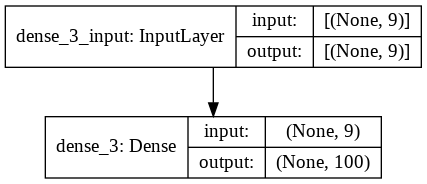

In [ ]:
model_1.summary()
plot_model(model=model_1, show_shapes=True)

> Evaluate the model

In [ ]:
model_1.evaluate(X_test, y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.0307 - mse: 0.0307


[0.030702633783221245, 0.030702633783221245]

In [ ]:
y_preds_1 = model_1.predict(X_test)

In [ ]:
# Compare Real time with Predict time

df_1 = add_ypreds(X_test, y_test, y_preds_1)
df_1

,A_X,A_Y,A_Z,B_X,B_Y,B_Z,C_X,C_Y,C_Z,Time,Predict Time
0,1670.0,-880.0,1205.0,375.0,-2600.0,467.0,783.87,-1966.89,843.66,2.304,2.198745
1,1650.0,880.0,1220.0,425.0,2072.5,482.0,782.93,1597.76,782.78,2.040,2.197965
2,1650.0,880.0,1220.0,425.0,2072.5,482.0,1089.18,1340.85,887.73,1.992,2.163388
3,1650.0,880.0,1220.0,950.0,2241.5,482.0,1393.72,1688.40,834.53,1.824,2.003874
4,1650.0,880.0,1220.0,600.0,2360.0,702.0,1122.02,1586.17,894.33,2.064,2.072806
...,...,...,...,...,...,...,...,...,...,...,...
511,1670.0,-880.0,1205.0,210.0,-2285.0,877.0,1071.35,-1599.50,1042.53,2.136,2.122543
512,1650.0,880.0,1220.0,775.0,2072.5,702.0,1236.00,1484.15,933.64,1.800,2.022262
513,1670.0,-880.0,1205.0,825.0,-2600.0,467.0,1328.92,-1545.59,1000.83,2.112,2.071564
514,1650.0,880.0,1220.0,662.5,2647.5,482.0,1098.43,1995.60,1773.55,2.640,2.461007


### Build `model_2`

1. Layer: 2 
2. Activation: linear
3. Optimizers: Adam
4. Loss: mse

In [ ]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model_2 = tf.keras.Sequential([layers.Dense(100, activation="linear"),
                               layers.Dense(10, activation="linear")])
model_2.compile( loss=tf.keras.losses.mse,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mse"])
model_2.fit(X_train, y_train, epochs=50, verbose=1, callbacks=[callback])

Epoch 1/50
65/65 [==============================] - 0s 1ms/step - loss: 77593.7656 - mse: 77593.7656
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 2343.0679 - mse: 2343.0679
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 796.9033 - mse: 796.9033
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 434.5256 - mse: 434.5256
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 295.7147 - mse: 295.7147
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 208.9839 - mse: 208.9839
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 153.7919 - mse: 153.7919
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 112.5886 - mse: 112.5886
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 86.4692 - mse: 86.4692
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 67.2198 - mse: 67.2198
Epoch 11/50
65/65 [========

> Summarize the model

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 100)               1000      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1010      
Total params: 2,010
Trainable params: 2,010
Non-trainable params: 0
_________________________________________________________________


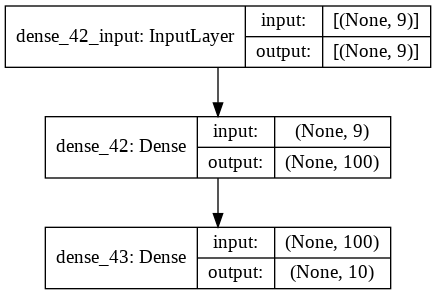

In [ ]:
model_2.summary()
plot_model(model=model_2, show_shapes=True)

> Evaluate the model

In [ ]:
model_2.evaluate(X_test, y_test)

17/17 [==============================] - 0s 2ms/step - loss: 0.0300 - mse: 0.0300


[0.029993753880262375, 0.029993753880262375]

In [ ]:
y_preds_2 = model_2.predict(X_test)

In [ ]:
df_2 = add_ypreds(X_test, y_test, y_preds_2)
df_2

,A_X,A_Y,A_Z,B_X,B_Y,B_Z,C_X,C_Y,C_Z,Time,Predict Time
0,1670.0,-880.0,1205.0,375.0,-2600.0,467.0,783.87,-1966.89,843.66,2.304,2.280656
1,1650.0,880.0,1220.0,425.0,2072.5,482.0,782.93,1597.76,782.78,2.040,2.253739
2,1650.0,880.0,1220.0,425.0,2072.5,482.0,1089.18,1340.85,887.73,1.992,2.238231
3,1650.0,880.0,1220.0,950.0,2241.5,482.0,1393.72,1688.40,834.53,1.824,2.069990
4,1650.0,880.0,1220.0,600.0,2360.0,702.0,1122.02,1586.17,894.33,2.064,2.135455
...,...,...,...,...,...,...,...,...,...,...,...
511,1670.0,-880.0,1205.0,210.0,-2285.0,877.0,1071.35,-1599.50,1042.53,2.136,2.200471
512,1650.0,880.0,1220.0,775.0,2072.5,702.0,1236.00,1484.15,933.64,1.800,2.098419
513,1670.0,-880.0,1205.0,825.0,-2600.0,467.0,1328.92,-1545.59,1000.83,2.112,2.158625
514,1650.0,880.0,1220.0,662.5,2647.5,482.0,1098.43,1995.60,1773.55,2.640,2.532831


### Build `model_3`

1. Layer: 3 
2. Activation: linear
3. Optimizers: Adam
4. Loss: mse

In [ ]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model_3 = tf.keras.Sequential([layers.Dense(100, activation="linear"),
                               layers.Dense(10, activation="linear"), 
                               layers.Dense(1, activation="linear")])
model_3.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mse"])
model_3.fit(X_train, y_train, epochs=50, verbose=1, callbacks=[callback])

Epoch 1/50
65/65 [==============================] - 0s 1ms/step - loss: 188440.9375 - mse: 188440.9375
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 2513.6060 - mse: 2513.6060
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 669.0187 - mse: 669.0187
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 353.9878 - mse: 353.9878
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 184.8208 - mse: 184.8208
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 101.5763 - mse: 101.5763
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 56.6169 - mse: 56.6169
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 30.2302 - mse: 30.2302
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 18.3317 - mse: 18.3317
Epoch 10/50
65/65 [==============================] - 0s 1ms/step - loss: 9.1041 - mse: 9.1041
Epoch 11/50
65/65 [============

> Summarize the model

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 100)               1000      
_________________________________________________________________
dense_97 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 11        
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


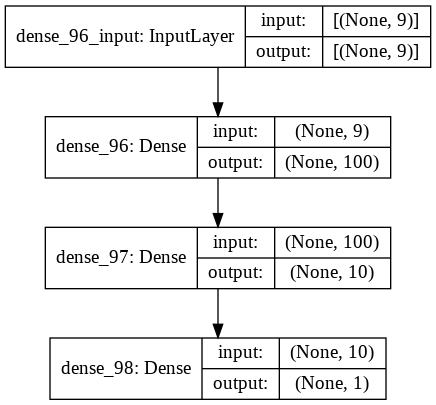

In [ ]:
model_3.summary()
plot_model(model=model_3, show_shapes=True)

> Evaluate the model

In [ ]:
model_3.evaluate(X_test, y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.0202 - mse: 0.0202


[0.020168710500001907, 0.020168710500001907]

In [ ]:
y_preds_3 = model_3.predict(X_test)

In [ ]:
df_3 = add_ypreds(X_test, y_test, y_preds_3)
df_3

,A_X,A_Y,A_Z,B_X,B_Y,B_Z,C_X,C_Y,C_Z,Time,Predict Time
0,1670.0,-880.0,1205.0,375.0,-2600.0,467.0,783.87,-1966.89,843.66,2.304,2.257434
1,1650.0,880.0,1220.0,425.0,2072.5,482.0,782.93,1597.76,782.78,2.040,2.169397
2,1650.0,880.0,1220.0,425.0,2072.5,482.0,1089.18,1340.85,887.73,1.992,2.131560
3,1650.0,880.0,1220.0,950.0,2241.5,482.0,1393.72,1688.40,834.53,1.824,1.933981
4,1650.0,880.0,1220.0,600.0,2360.0,702.0,1122.02,1586.17,894.33,2.064,2.028052
...,...,...,...,...,...,...,...,...,...,...,...
511,1670.0,-880.0,1205.0,210.0,-2285.0,877.0,1071.35,-1599.50,1042.53,2.136,2.175618
512,1650.0,880.0,1220.0,775.0,2072.5,702.0,1236.00,1484.15,933.64,1.800,1.972275
513,1670.0,-880.0,1205.0,825.0,-2600.0,467.0,1328.92,-1545.59,1000.83,2.112,2.091073
514,1650.0,880.0,1220.0,662.5,2647.5,482.0,1098.43,1995.60,1773.55,2.640,2.415905


> Save the model

In [ ]:
keras.models.save_model(model_3, "/content/drive/MyDrive/ABB/Path_Optimizer_Savedmodel.h5")

> Load the model

In [ ]:
Path_Optimizer_Model = keras.models.load_model('/content/drive/MyDrive/ABB/Path_Optimizer_Savedmodel.h5')

In [ ]:
Path_Optimizer_Model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 100)               1000      
_________________________________________________________________
dense_97 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 11        
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Path_Optimizer_Model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.0202 - mse: 0.0202


[0.020168710500001907, 0.020168710500001907]

### Build `model_4`

1. Layer:
2. Activation: 
3. Optimizers: Adam
4. Loss: mse

In [ ]:
tf.random.set_seed(42)

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model_4 = keras.Sequential([layers.Dense(16, activation='linear'),
                            layers.Dense(8, activation='linear'),
                            layers.Dense(1, activation='linear')])
model_4.compile( optimizer=tf.keras.optimizers.Adam(),
                 loss=keras.losses.mse,
                 metrics=['mse'])
model_4.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[callback])

Epoch 1/100
65/65 [==============================] - 0s 1ms/step - loss: 162795.7969 - mse: 162795.7969
Epoch 2/100
65/65 [==============================] - 0s 1ms/step - loss: 14303.0010 - mse: 14303.0010
Epoch 3/100
65/65 [==============================] - 0s 1ms/step - loss: 8467.2305 - mse: 8467.2305
Epoch 4/100
65/65 [==============================] - 0s 1ms/step - loss: 4821.1353 - mse: 4821.1353
Epoch 5/100
65/65 [==============================] - 0s 1ms/step - loss: 2673.9744 - mse: 2673.9744
Epoch 6/100
65/65 [==============================] - 0s 1ms/step - loss: 1584.7722 - mse: 1584.7722
Epoch 7/100
65/65 [==============================] - 0s 1ms/step - loss: 1072.5637 - mse: 1072.5637
Epoch 8/100
65/65 [==============================] - 0s 1ms/step - loss: 791.0033 - mse: 791.0033
Epoch 9/100
65/65 [==============================] - 0s 1ms/step - loss: 626.8076 - mse: 626.8076
Epoch 10/100
65/65 [==============================] - 0s 1ms/step - loss: 477.6741 - mse: 477.6741

> Summarize the model

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 100)               1000      
_________________________________________________________________
dense_31 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 21        
Total params: 3,041
Trainable params: 3,041
Non-trainable params: 0
_________________________________________________________________


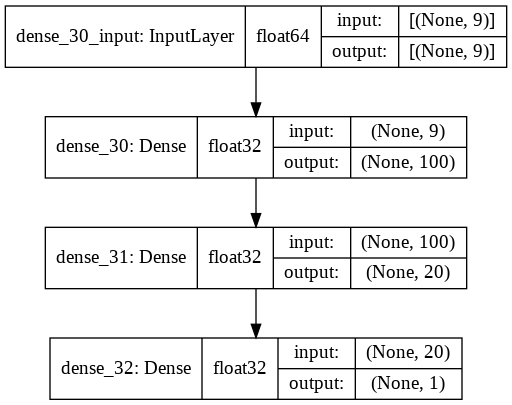

In [ ]:
model_4.summary()
plot_model(model_4, show_shapes=True, show_dtype=True)

> Evaluate the model

In [ ]:
model_4.evaluate(X_test, y_test)

17/17 [==============================] - 0s 2ms/step - loss: 0.0201 - mse: 0.0201


[0.020102333277463913, 0.020102333277463913]

In [ ]:
y_preds_4 = model_4.predict(X_test)

In [ ]:
df_4 = add_ypreds(X_test, y_test, y_preds_4)
df_4

,A_X,A_Y,A_Z,B_X,B_Y,B_Z,C_X,C_Y,C_Z,Time,Predict Time
0,1670.0,-880.0,1205.0,375.0,-2600.0,467.0,783.87,-1966.89,843.66,2.304,2.284939
1,1650.0,880.0,1220.0,425.0,2072.5,482.0,782.93,1597.76,782.78,2.040,2.180547
2,1650.0,880.0,1220.0,425.0,2072.5,482.0,1089.18,1340.85,887.73,1.992,2.148544
3,1650.0,880.0,1220.0,950.0,2241.5,482.0,1393.72,1688.40,834.53,1.824,1.935602
4,1650.0,880.0,1220.0,600.0,2360.0,702.0,1122.02,1586.17,894.33,2.064,2.040468
...,...,...,...,...,...,...,...,...,...,...,...
511,1670.0,-880.0,1205.0,210.0,-2285.0,877.0,1071.35,-1599.50,1042.53,2.136,2.202258
512,1650.0,880.0,1220.0,775.0,2072.5,702.0,1236.00,1484.15,933.64,1.800,1.980791
513,1670.0,-880.0,1205.0,825.0,-2600.0,467.0,1328.92,-1545.59,1000.83,2.112,2.102412
514,1650.0,880.0,1220.0,662.5,2647.5,482.0,1098.43,1995.60,1773.55,2.640,2.435587


### Try to save the model in Json

In [ ]:
model_3_json = model_3.to_json

In [ ]:
with open("model_3.json", "w") as json_file:
    json_file.write(model_3_json)

# serialize weights to HDF5
model.save_weights("model_3.h5")
print("Saved model to disk")

NameError: ignored